In [3]:
import webbrowser
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
        
names= {0: 'b', 1: 'b', 2: 'k', 3: 'k', 4: 'n', 5: 'n', 6: 'board', 7: 'p', 8: 'p', 9: 'q', 10: 'q', 11: 'r', 12: 'r', 13: 'eb', 14: 'ew', 15: 'B', 16: 'B', 17: 'K', 18: 'K', 19: 'N', 20: 'N', 21: 'P', 22: 'P', 23: 'Q', 24: 'Q', 25: 'R', 26: 'R'}
        

from PIL import Image
import os

from ultralytics import YOLO
model = YOLO('chess.pt')

results = model.predict('a.jpg',save=True)
box = results[0].boxes[0]
coord=box.xyxy[0].tolist()

height_diff=abs(coord[-1]-coord[1])/8
inter_points_height=[]
inter_points_width=[]

inter_points_height.append(coord[1])
moving=coord[1]

for i in range(8):
   moving+=height_diff
   inter_points_height.append(moving)

   
width_diff=abs(coord[2]-coord[0])/8
inter_points_width.append(coord[0])
moving=coord[0]

for i in range(8):
   moving+=width_diff
   inter_points_width.append(moving)  




import os
# Create a directory to save cropped images and results
output_dir = 'CROP/'
os.makedirs(output_dir, exist_ok=True)
model = YOLO('best.pt')
# Iterate through cropped images
counter=0
req_url=''


image 1/1 d:\LICH\ultralytics\a.jpg: 384x640 1 0, 587.3ms
Speed: 5.0ms preprocess, 587.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict


In [2]:
for h_start, h_end in zip(inter_points_height[:-1], inter_points_height[1:]):
    
    temp=''
    space=0
    for w_start, w_end in zip(inter_points_width[:-1], inter_points_width[1:]):
        counter+=1
        # Crop the image based on the current coordinates
        cropped_image = Image.open('a.jpg').crop((w_start, h_start, w_end, h_end))
      #   cropped_image.show()
      #   Apply your model to the cropped image
        results = model.predict(cropped_image, save=True)  # Avoid saving the cropped image again
        classid=names[int(results[0].boxes[0].cls[0].item())]
        
        if classid=='board':
           continue

        elif classid=='eb' or classid=='ew':
           space+=1
        
        else:
           if space!=0:
             temp+=str(space)
             space=0 
           temp+=classid               

             



        # Get the processed YOLO image (assuming it's saved in run/detect/exp/ folder)
        yolo_image_path = os.path.join('runs/detect/predict2/', os.path.basename('image0.jpg'))
        # Save the YOLO image to the output directory
        output_path = os.path.join(output_dir, f'{counter}.jpg')
        os.rename(yolo_image_path, output_path)

    if space!=0:
       
       temp+=str(space)
    req_url+=temp+"/" 


0: 640x640 1 ew, 871.9ms
Speed: 7.0ms preprocess, 871.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict6


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'runs/detect/predict2/image0.jpg' -> 'CROP/1.jpg'

In [51]:
from multiprocessing import Pool
from PIL import Image
res=[]
def process_cropped_image(args):
    h_start, h_end, w_start, w_end = args
    cropped_image = Image.open('a.jpg').crop((w_start, h_start, w_end, h_end))
    results = model.predict(cropped_image, save=True)
    class_id = names[int(results[0].boxes[0].cls[0].item())]
    res.append(class_id)
    return class_id

if __name__ == "__main__":
    # Assuming inter_points_height and inter_points_width are your height and width ranges
    height_width_ranges = [(h_start, h_end, w_start, w_end,k) for (h_start, h_end) in zip(inter_points_height[:-1], inter_points_height[1:])
                          for (w_start, w_end) in zip(inter_points_width[:-1], inter_points_width[1:]) for k in range(64)]



[(170.9075164794922, 244.67291450500488, 472.8575439453125, 547.6768035888672),
 (170.9075164794922, 244.67291450500488, 547.6768035888672, 622.4960632324219),
 (170.9075164794922, 244.67291450500488, 622.4960632324219, 697.3153228759766),
 (170.9075164794922, 244.67291450500488, 697.3153228759766, 772.1345825195312),
 (170.9075164794922, 244.67291450500488, 772.1345825195312, 846.9538421630859),
 (170.9075164794922, 244.67291450500488, 846.9538421630859, 921.7731018066406),
 (170.9075164794922, 244.67291450500488, 921.7731018066406, 996.5923614501953),
 (170.9075164794922, 244.67291450500488, 996.5923614501953, 1071.41162109375),
 (244.67291450500488, 318.4383125305176, 472.8575439453125, 547.6768035888672),
 (244.67291450500488, 318.4383125305176, 547.6768035888672, 622.4960632324219),
 (244.67291450500488, 318.4383125305176, 622.4960632324219, 697.3153228759766),
 (244.67291450500488, 318.4383125305176, 697.3153228759766, 772.1345825195312),
 (244.67291450500488, 318.4383125305176, 

In [35]:
model = YOLO('chess.pt')


In [56]:
import concurrent.futures
from PIL import Image
model = YOLO('chess.pt')
model2 = YOLO('chess.pt')

def f(args,):
    
    h_start, h_end, w_start, w_end,k = args
    cropped_image = Image.open('a.jpg').crop((w_start, h_start, w_end, h_end))
    if k==1:
      results = model2.predict(cropped_image)
    results = model.predict(cropped_image)
    class_id = names[int(results[0].boxes[0].cls[0].item())]
    return class_id

def parallel_function_calls(inputs):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        # Map the function to inputs, running them in parallel
        results = list(executor.map(f, inputs))

    return results

# Example usage:

output_values = parallel_function_calls(height_width_ranges[:10])
print(output_values)








Ultralytics YOLOv8.0.227 🚀 Python-3.9.8 torch-2.0.0+cpu CPU (AMD Ryzen 7 4800HS with Radeon Graphics)
Ultralytics YOLOv8.0.227 🚀 Python-3.9.8 torch-2.0.0+cpu CPU (AMD Ryzen 7 4800HS with Radeon Graphics)
Ultralytics YOLOv8.0.227 🚀 Python-3.9.8 torch-2.0.0+cpu CPU (AMD Ryzen 7 4800HS with Radeon Graphics)
Ultralytics YOLOv8.0.227 🚀 Python-3.9.8 torch-2.0.0+cpu CPU (AMD Ryzen 7 4800HS with Radeon Graphics)
Ultralytics YOLOv8.0.227 🚀 Python-3.9.8 torch-2.0.0+cpu CPU (AMD Ryzen 7 4800HS with Radeon Graphics)
Ultralytics YOLOv8.0.227 🚀 Python-3.9.8 torch-2.0.0+cpu CPU (AMD Ryzen 7 4800HS with Radeon Graphics)


0: 640x640 1 0, 2509.2ms
Speed: 13.0ms preprocess, 2509.2ms inference, 28.5ms postprocess per image at shape (1, 3, 640, 640)

Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
Model summ

AttributeError: bn

In [53]:
height_width_ranges[0]

(170.9075164794922,
 244.67291450500488,
 472.8575439453125,
 547.6768035888672,
 0)

In [105]:
import webbrowser
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
        
names= {0: 'b', 1: 'b', 2: 'k', 3: 'k', 4: 'n', 5: 'n', 6: 'board', 7: 'p', 8: 'p', 9: 'q', 10: 'q', 11: 'r', 12: 'r', 13: 'eb', 14: 'ew', 15: 'B', 16: 'B', 17: 'K', 18: 'K', 19: 'N', 20: 'N', 21: 'P', 22: 'P', 23: 'Q', 24: 'Q', 25: 'R', 26: 'R'}
        

from PIL import Image
import os



from ultralytics import YOLO
model = YOLO('chess.pt')

results = model.predict('blue.png',save=True)
box = results[0].boxes[0]
coord=box.xyxy[0].tolist()





image 1/1 d:\LICH\ultralytics\blue.png: 640x640 1 0, 942.3ms
Speed: 9.0ms preprocess, 942.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict37


In [2]:
print(coord)

[22.061145782470703, 0.0, 837.958984375, 807.990234375]


In [109]:
from PIL import Image, ImageDraw

# Assuming coord is a list containing the bounding box coordinates [x_min, y_min, x_max, y_max]
image_path = 'blue.png'

# Open the image
img = Image.open(image_path)

# Convert bounding box coordinates to (x, y, width, height) format
x_min, y_min, x_max, y_max = coord
x, y, width, height = x_min, y_min, x_max - x_min, y_max - y_min

# Crop the image to the bounding box
cropped_img = img.crop((x, y, x + width, y + height))

# Create a drawing object on the cropped image
draw = ImageDraw.Draw(cropped_img)

# Draw a rectangle using the bounding box coordinates on the cropped image
draw.rectangle([0, 0, width, height],width=1)

# Show the cropped image
cropped_img.show()
cropped_np_array = np.array(cropped_img)
# Load the NumPy array in grayscale using OpenCV
image_gray = cv2.cvtColor(cropped_np_array, cv2.COLOR_RGB2GRAY)



In [111]:
import cv2
import numpy as np
from PIL import Image, ImageDraw

# Load the image
image_path = 'blue.png'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for PIL

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a GaussianBlur to reduce noise and improve contour detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edged image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area in descending order
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Extract the top 3 largest contours (squares)
top_contours = contours[:2]

# Draw the contours on a blank image for visualization
contour_image = np.zeros_like(gray)
cv2.drawContours(contour_image, top_contours, -1, (255, 255, 255), 2)

# Display the result
Image.fromarray(contour_image).show()

# Extract coordinates of the top 3 largest squares
top_square_coords = [cv2.boundingRect(contour) for contour in top_contours]

# Print the coordinates
print("Top 3 square coordinates:")
for i, (x, y, w, h) in enumerate(top_square_coords):
    print(f"Square {i + 1}: x={x}, y={y}, width={w}, height={h}")


Top 3 square coordinates:
Square 1: x=28, y=219, width=797, height=586
Square 2: x=28, y=24, width=300, height=196


In [113]:
import cv2
import numpy as np
from PIL import Image, ImageDraw

# Load the image
image_path = 'blue.png'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for PIL

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a GaussianBlur to reduce noise and improve contour detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edged image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on the number of corners (4 for squares)
squares = [contour for contour in contours if len(cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)) == 4]

# Sort the squares by area in descending order
squares = sorted(squares, key=cv2.contourArea, reverse=False)

# Extract the top 3 largest squares
top_squares = squares[:3]

# Draw the contours on a blank image for visualization
contour_image = np.zeros_like(gray)
cv2.drawContours(contour_image, top_squares, -1, (255, 255, 255), 2)

# Display the result
Image.fromarray(contour_image).show()

# Extract coordinates of the top 3 largest squares
top_square_coords = [cv2.boundingRect(square) for square in top_squares]

# Print the coordinates
print("Top 3 square coordinates:")
for i, (x, y, w, h) in enumerate(top_square_coords):
    print(f"Square {i + 1}: x={x}, y={y}, width={w}, height={h}")


Top 3 square coordinates:
Square 1: x=380, y=238, width=9, height=48
Square 2: x=792, y=689, width=3, height=2
Square 3: x=757, y=689, width=4, height=2


In [61]:
def find_sequence_with_deviation(lst, target_sequence_length, max_deviation):
     lst=np.diff(lst)
     avg=np.mean(lst)
     if len(lst)!=7:
         return False
     for i in lst:
          if i<=avg+max_deviation or i>=avg-max_deviation:
               continue
          else:
               return False
     return True     
 
# Example usage:
input_list = [120,202, 306, 403, 504, 602, 716, 784]
target_length = 7
max_deviation_value = 20

sequence_length = find_sequence_with_deviation(input_list, target_length, max_deviation_value)
print(sequence_length)


False


In [94]:
def find_sequence_with_deviation(lst,max_deviation):
     lst=np.diff(lst)
     avg=np.mean(lst)
     if len(lst)!=7:
         return False
     for i in lst:
          if i<=avg+max_deviation or i>=avg-max_deviation:
               continue
          else:
               return False
     return True     



def remove_close_values(input_list, threshold):
    result = [input_list[0]]
    
    
    for value in input_list[1:]:
        if abs(value - result[-1]) > threshold:
            result.append(value)
    
   
    return result



def remove(strip):
    
    for mean_value in range(255,0,-1):
    
    
       # Find pixel indices where the strip crosses the mean line
       crossings_indices = np.where(np.diff((strip > mean_value).astype(int)))[0]
       
       # Calculate differences between adjacent values in the point positions
       point_diffs = np.diff(crossings_indices)
       
       
       
       # Display the number of intersections
    #    print(f'Number of intersections: {crossings_indices.size}')
       
       # Display the pixel indices where the strip crosses the mean line
    #    print(f'Pixel indices where the strip crosses the mean line: {crossings_indices}')

       if len(crossings_indices):
        threshold_value = 50
        crossings_indices = remove_close_values(crossings_indices, threshold_value)
        
       
       # Display the differences between adjacent point positions
    #    print(f'Differences between adjacent point positions: {point_diffs}')
       
    
    
       
       if len(crossings_indices)<8:
           continue
    
       threshold = 40  # Adjust the threshold based on your requirements
       result = find_sequence_with_deviation(crossings_indices, threshold)
       print(crossings_indices,result)
       
       
       if result:
        #    print("The list has a sequence of 8 almost equal values.")
           
           return(crossings_indices)
           
  
    return None
           


In [103]:
def start_end(center_strip):

  spikes=remove(center_strip) 
  print(spikes)
  avg_diffs = int(np.average(np.diff(spikes)))
  
  low = center_strip[int((spikes[3]+spikes[0])/2)]
  
  if spikes[0]-avg_diffs <0:
      start=0
  else:
      start= spikes[0]-avg_diffs 
  
  if abs(np.average(center_strip[start:spikes[0]])-low) <10:
      spikes.insert(0,start)
  else:
      spikes.append(spikes[-1]+avg_diffs)  

  return spikes[0],spikes[-1]

  
    
startr,endr=start_end(center_row_strip)

startc,endc=start_end(center_col_strip)



print(startc,endc)



[129, 202, 306, 403, 504, 602, 723, 782] True
[129, 202, 306, 403, 504, 602, 723, 782]
[26, 111, 220, 315, 414, 510, 609, 682] True
[26, 111, 220, 315, 414, 510, 609, 682]
26 775


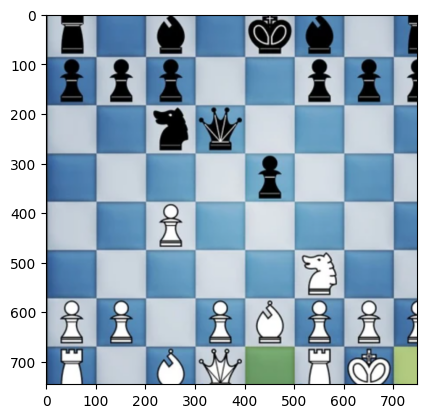

In [104]:
image_path = 'blue.png'

# Open the image
img = Image.open(image_path)
img = np.array(img)
cropped_image = img[startr:endr, startc:endc]

# Display the cropped image (you might need a library like OpenCV or Matplotlib)
import matplotlib.pyplot as plt

plt.imshow(cropped_image, cmap='gray')  # Assuming it's a grayscale image
plt.show()

In [21]:
startr,endr

(106, 895)

In [22]:
startc,endc

(25, 802)